# ML Computer HW 1
## Student Name: Amirmehdi Jafari Fesharaki
## Student ID: 98109645
--------

## Question 1

### Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t as t_dist

In [2]:
data_org = pd.read_csv('Q1_data.csv').dropna()
data = data_org.sample(frac=1).reset_index(drop=True)
data_len = len(data)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,466,322,110,3,4.0,5.0,8.64,1,0.85
1,76,329,114,2,2.0,4.0,8.56,1,0.72
2,54,326,114,3,3.0,3.0,9.11,1,0.83
3,449,298,98,2,4.0,3.0,8.03,0,0.34
4,498,320,110,5,4.0,4.0,9.27,1,0.87
...,...,...,...,...,...,...,...,...,...
497,219,325,114,4,3.0,2.0,8.40,0,0.70
498,360,315,106,3,4.5,3.5,8.42,0,0.72
499,419,319,110,3,3.0,2.5,8.79,0,0.72
500,60,328,110,4,4.0,2.5,9.02,1,0.81


In [3]:
train_len = int(data_len * 80/100)
test_len = data_len - train_len
train_set = data.loc[np.arange(0, train_len)]
test_set = data.loc[np.arange(train_len, data_len)].reset_index(drop=True)

Now the parameter 'train_set' contains 80% of data and 'test_set' contains the remaining 20%

### Part 2

In this part we define X as the matrix that contains our train_set and as we proved in question 1 of theoretical HW, we have to add a column filled by 1 in the first column of X and set the other columns as the value of each feature. Finally, we set Y as the values inside column 'Chance of Admit'

In [4]:
train_set

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,466,322,110,3,4.0,5.0,8.64,1,0.85
1,76,329,114,2,2.0,4.0,8.56,1,0.72
2,54,326,114,3,3.0,3.0,9.11,1,0.83
3,449,298,98,2,4.0,3.0,8.03,0,0.34
4,498,320,110,5,4.0,4.0,9.27,1,0.87
...,...,...,...,...,...,...,...,...,...
396,21,325,112,4,3.5,3.5,8.92,0,0.55
397,288,325,111,4,4.0,4.5,9.11,1,0.83
398,264,333,113,5,4.0,4.0,9.28,1,0.89
399,61,333,119,5,5.0,4.5,9.78,1,0.96


In [5]:
test_set

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,471,338,118,4,3.0,4.5,9.40,1,0.91
1,277,328,108,4,4.5,4.0,9.18,1,0.84
2,500,307,101,3,4.0,3.0,8.20,0,0.47
3,101,312,105,2,2.0,2.5,8.45,0,0.72
4,91,314,102,4,2.5,2.0,7.88,1,0.59
...,...,...,...,...,...,...,...,...,...
96,219,325,114,4,3.0,2.0,8.40,0,0.70
97,360,315,106,3,4.5,3.5,8.42,0,0.72
98,419,319,110,3,3.0,2.5,8.79,0,0.72
99,60,328,110,4,4.0,2.5,9.02,1,0.81


In [6]:
train_set_x = train_set[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA','Research']]
train_set_x.insert(0, "B0", np.ones(train_len), True)
X = train_set_x.to_numpy()

In [7]:
Y = train_set['Chance of Admit '].to_numpy()

Now we calculate the regression parameters vector using the following equation
$$
    \beta = (X^T X)^{-1}X^T Y
$$

In [8]:
beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),Y)
print(beta)

[-1.38346517e+00  4.33348541e-05  2.24716903e-03  2.74115124e-03
  9.68967246e-03 -2.26813869e-03  1.61752107e-02  1.16462485e-01
  1.99052747e-02]


### Part 3

In [9]:
Y_hat = np.matmul(X,beta)
dY = Y - Y_hat
dY2 = dY**2
MSE_train = np.sum(dY2)/train_len
print("The Mean Squered Error of Train Set is:", MSE_train)

The Mean Squered Error of Train Set is: 0.0034882542280672817


In [10]:
test_set_x = test_set[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA','Research']]
test_set_x.insert(0, "B0", np.ones(test_len), True)
X_test = test_set_x.to_numpy()
Y_test = test_set['Chance of Admit '].to_numpy()

In [11]:
Y_test_hat = np.matmul(X_test, beta) ## it is the estimated output value for test dataset
dY_test = Y_test - Y_test_hat
dY2_test = dY_test**2
MSE_test = np.sum(dY2_test)/test_len
print("The Mean Squered Error of Test Set is: ", MSE_test)

The Mean Squered Error of Test Set is:  0.0036273528139289255


<b> As it is shown, the MSE of test is more than the MSE of train in this particular case. <b>

### Part 4

In [12]:
labels = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA','Research']

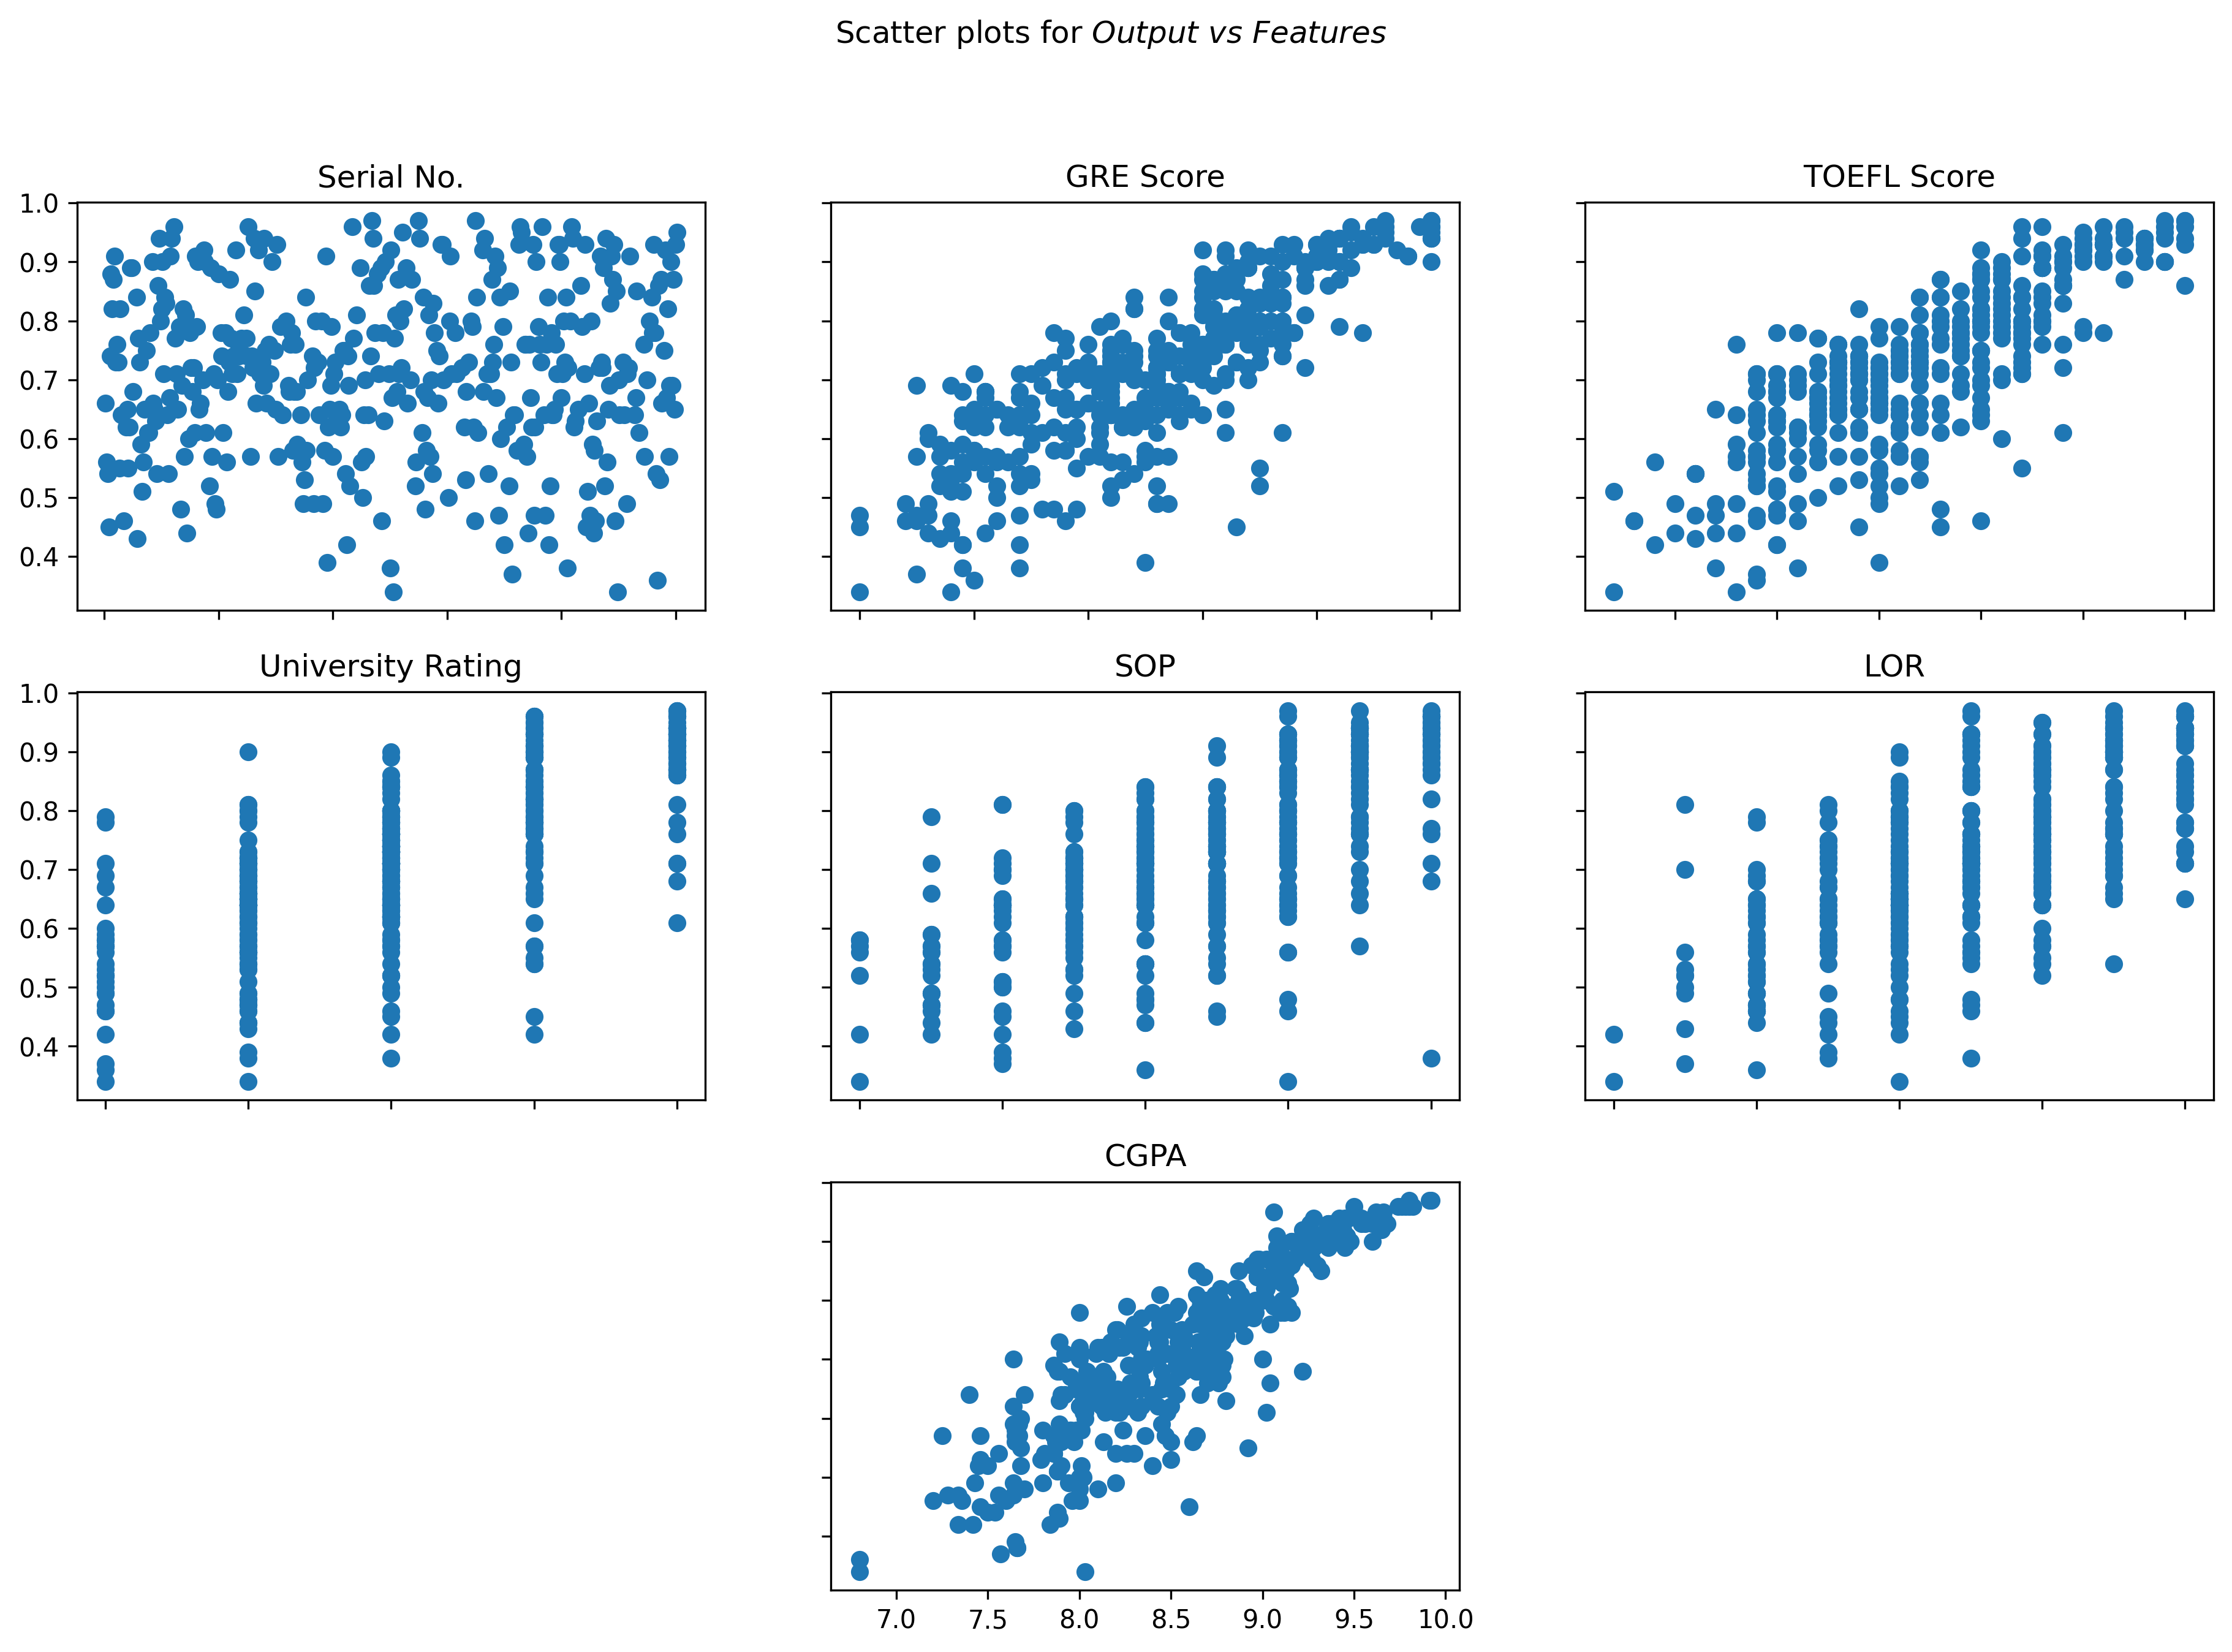

In [13]:
fig = plt.figure(figsize = (15,10), dpi=300)
axs = fig.subplots(3, 3)
axs[0, 0].scatter(X[:,1], Y)
axs[0, 0].set_title(labels[0])
axs[0, 1].scatter(X[:,2], Y)
axs[0, 1].set_title(labels[1])
axs[0, 2].scatter(X[:,3], Y)
axs[0, 2].set_title(labels[2])
axs[1, 0].scatter(X[:,4], Y)
axs[1, 0].set_title(labels[3])
axs[1, 1].scatter(X[:,5], Y)
axs[1, 1].set_title(labels[4])
axs[1, 2].scatter(X[:,6], Y)
axs[1, 2].set_title(labels[5])
axs[2, 1].scatter(X[:,7], Y)
axs[2, 1].set_title(labels[6])

fig.delaxes(axs[2,0])
fig.delaxes(axs[2,2])
fig.suptitle(r'Scatter plots for $Output\ vs\ Features$')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<b>It can be concluded from the plots that the 'Chance of Admit' is more likely to have a relation with the 'CGPA' in comparison with the other features.<b>

### Part 5
We again use the equation $ \beta = (X^T X)^{-1} X^T Y $ to calculate the regression parameters vector but this time we do a univariate regression.

Variable 'beta_CPGA' keeps the values for the regression parameters vector here.

In [14]:
X_CGPA = X[:,[0,7]]
beta_CGPA = np.linalg.inv(np.transpose(X_CGPA) @ X_CGPA) @ np.transpose(X_CGPA) @ Y
print("The parameters vector is: ", beta_CGPA)

The parameters vector is:  [-1.07102189  0.20899223]


In [15]:
Y_CGPA_hat = X_CGPA @ beta_CGPA
dY_CGPA = Y - Y_CGPA_hat
dY2_CGPA = dY_CGPA**2
MSE_CGPA_train = np.sum(dY2_CGPA)/len(dY2_CGPA)
print("The Mean Squered Error of the train is: ", MSE_CGPA_train)

The Mean Squered Error of the train is:  0.004444016733733261


In [16]:
X_CGPA_test = X_test[:,[0,7]]
Y_CGPA_test_hat = X_CGPA_test @ beta_CGPA
dY_CGPA_test = Y_test - Y_CGPA_test_hat
dY2_CGPA_test = dY_CGPA_test**2
MSE_CGPA_test = np.sum(dY2_CGPA_test)/len(dY2_CGPA_test)
print("The Mean Squered Error of the test is: ", MSE_CGPA_test)

The Mean Squered Error of the test is:  0.004169857742690311


The Mean Squered Error of both test and train datasets is higher in this univariate regression in comparison with the multivariate regression that we have done before.

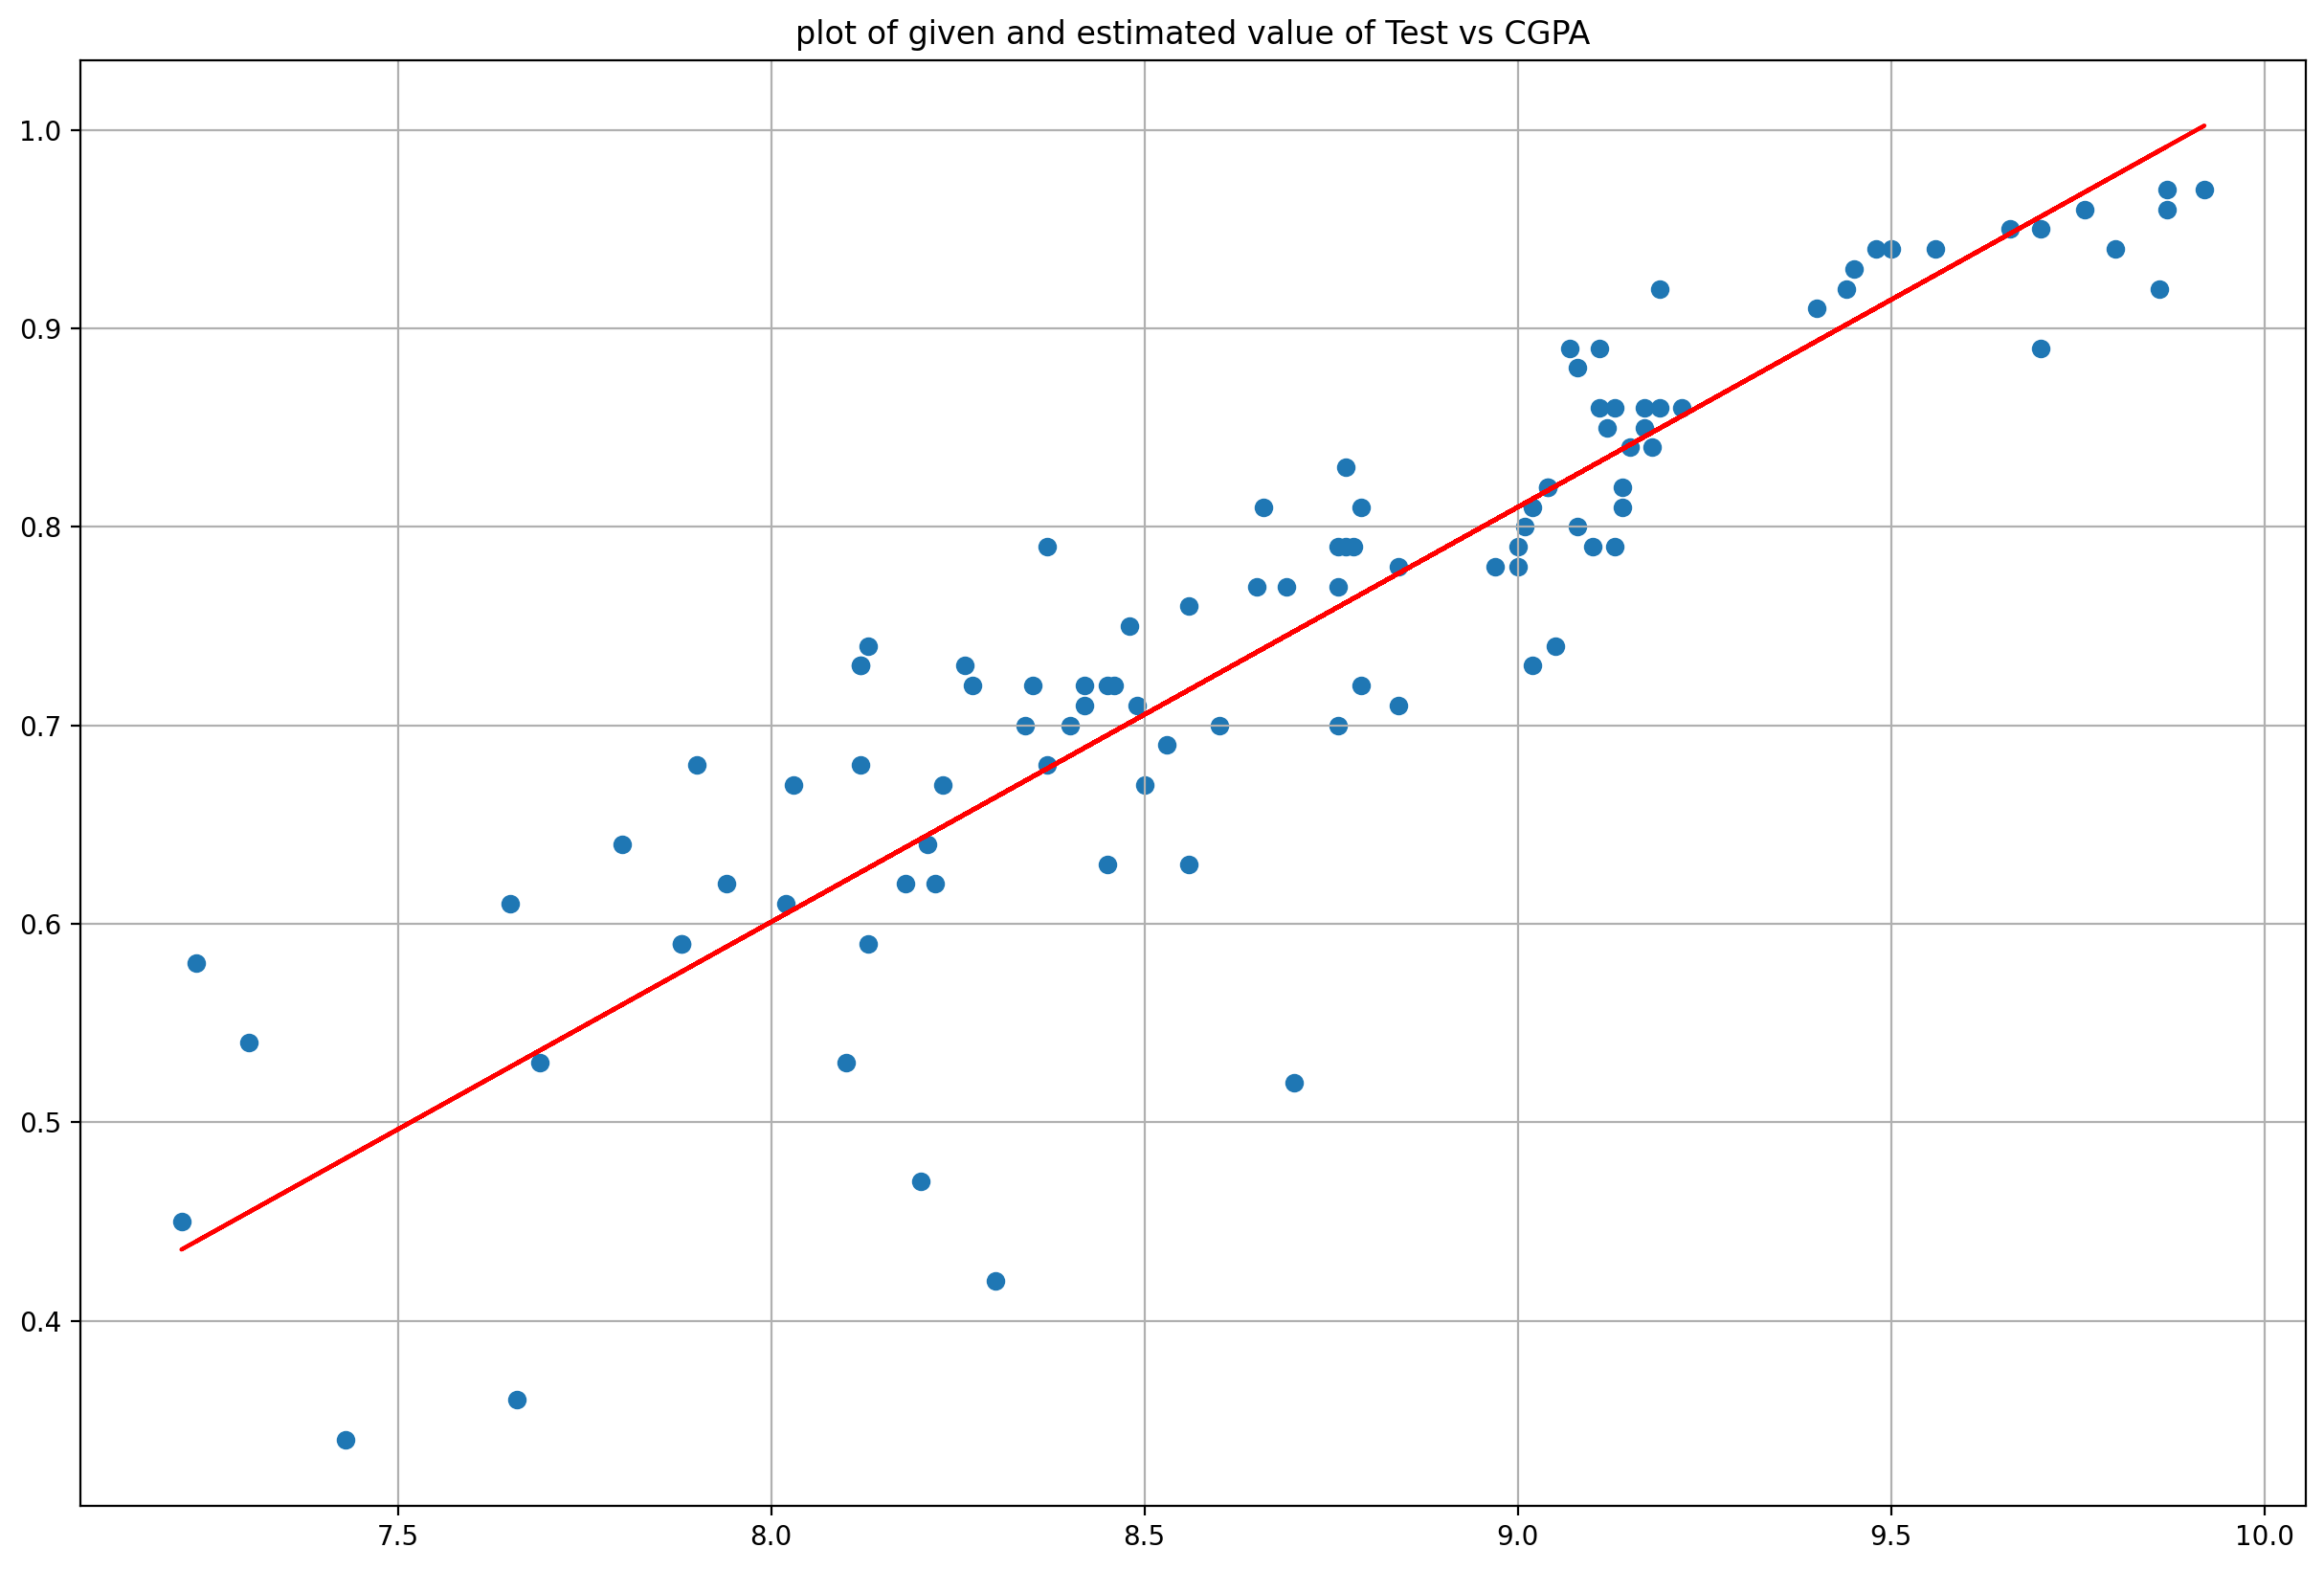

In [17]:
fig2 = plt.figure(figsize=(15,10), dpi=200)
x_sorted = np.sort(X_CGPA_test[:,1])
plt.plot(X_CGPA_test[:,1], Y_CGPA_test_hat, c='red')
plt.scatter(X_CGPA_test[:,1], Y_test)
plt.title("plot of given and estimated value of Test vs CGPA")
plt.grid(True)

---
## Question 2

### Part 1

In [18]:
q2_data_org = pd.read_csv('Q2_data.csv').dropna()
q2_data = q2_data_org.sample(frac=1).reset_index(drop=True)
test_data = q2_data.iloc[0:600]
test_array = test_data[['LotFrontage', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'KitchenAbvGr', 'YrSold', 'SalePrice']].to_numpy()

train_data = q2_data.iloc[600:len(q2_data)].reset_index(drop=True)
train_array = train_data[['LotFrontage', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'KitchenAbvGr', 'YrSold', 'SalePrice']].to_numpy()

### Part 2
#### *Note: All the outputs are divided by 100000*

In [19]:
def regression_func(train_array, test_array, data_no):
    '''
    This function gets two numpy arrays containing the train and test datasets and also the number of data that is
    going to be used from the train dataset as the inputs and prints various information such as Parameter Vector,
    Train MSE and Test MSE. The output of this function is a tuple of Train MSE and Test MSE.
    '''
    print('--------------------')
    print('Number of Data Used: ', data_no)
    X = train_array[0:data_no,0:6]
    X = np.insert(X, 0, 1, axis=1)
    Y = train_array[0:data_no,6]/100000
    beta = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y
    print("Parameter Vector =\n", beta)
    Y_train_hat = X @ beta
    dY2_train = (Y - Y_train_hat)**2
    MSE_train = np.sum(dY2_train)/len(dY2_train)
    print("\n\nMSE of Train =",MSE_train)
    X_test = test_array[:, 0:6]
    X_test = np.insert(X_test, 0, 1, axis=1)
    Y_test = test_array[:,6]/100000
    Y_test_hat = X_test @ beta
    dY2_test = (Y_test - Y_test_hat)**2
    MSE_test = np.sum(dY2_test)/len(dY2_test)
    print("\n\nMSE of Test =", MSE_test)
    return (MSE_train, MSE_test)

In [20]:
MSE_train_list = np.array([[0, 0]])
MSE_test_list = np.array([[0, 0]])
for i in [20,40,60,80,100,200,300,400,500,600]:
    MSE_train, MSE_test = regression_func(train_array, test_array, i)
    MSE_train_list = np.append(MSE_train_list, [[i, MSE_train]], axis=0)
    MSE_test_list = np.append(MSE_test_list, [[i, MSE_test]], axis=0)
MSE_train_list = MSE_train_list[1:,:]
MSE_test_list = MSE_test_list[1:,:]

--------------------
Number of Data Used:  20
Parameter Vector =
 [-4.46979710e+01  6.15225654e-03  1.56115822e-04  1.43761422e-02
  4.13280864e-01  1.09864715e+00  6.96151159e-03]


MSE of Train = 0.3899116167824107


MSE of Test = 2.446038201214227
--------------------
Number of Data Used:  40
Parameter Vector =
 [-9.66212817e+01  5.05595550e-04  1.47005645e-04  1.59289124e-02
  6.73553766e-02 -1.67618994e-02  3.25856957e-02]


MSE of Train = 0.33967282192367465


MSE of Test = 1.8852261711282188
--------------------
Number of Data Used:  60
Parameter Vector =
 [-1.85007437e+02 -8.47039518e-04  1.95477632e-04  1.62369208e-02
  1.10721910e-01 -1.44436140e-01  7.61461334e-02]


MSE of Train = 0.5326172909561804


MSE of Test = 3.2597533897824262
--------------------
Number of Data Used:  80
Parameter Vector =
 [-1.36082184e+02  1.29066943e-02  3.59574603e-05  1.63574156e-02
  2.05708330e-01 -2.09683452e-01  5.18113980e-02]


MSE of Train = 0.5716068775340214


MSE of Test = 0.494552282

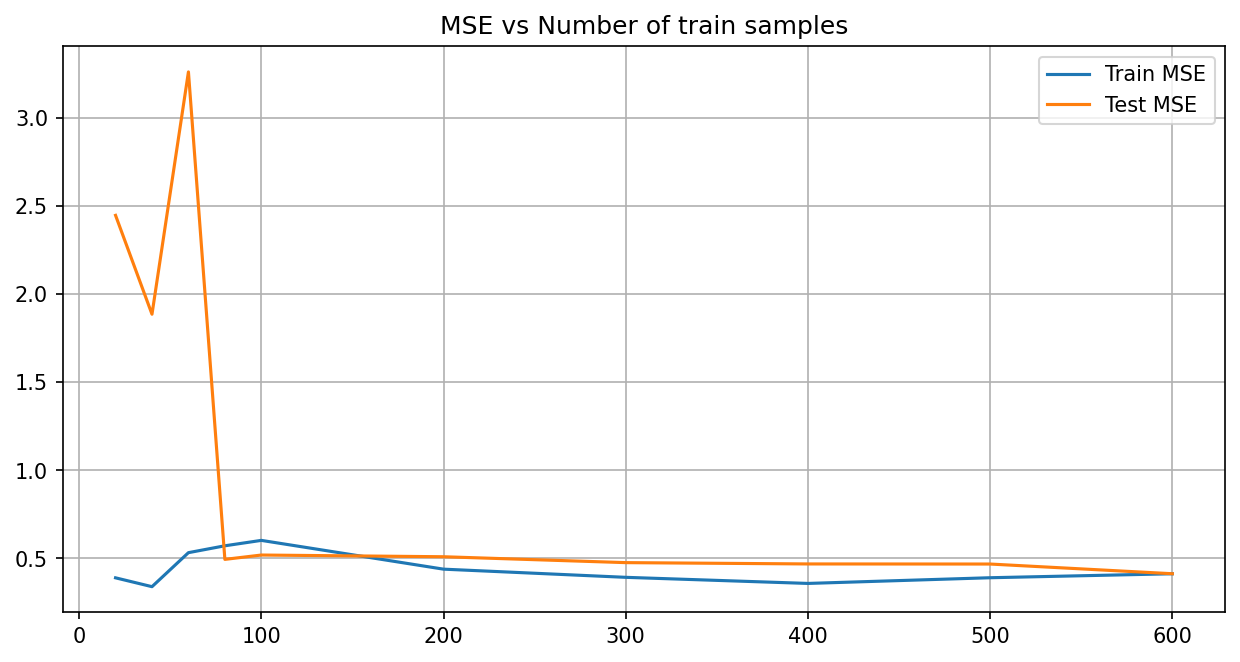

In [21]:
fig = plt.figure(figsize=(10,5), dpi=150)
x = MSE_train_list[:,0]
plt.plot(MSE_train_list[:,0], MSE_train_list[:,1])
plt.plot(MSE_test_list[:,0], MSE_test_list[:,1])
plt.legend(["Train MSE", "Test MSE"])
plt.grid()
plt.title("MSE vs Number of train samples")
plt.show()

<b>The results show that at first, due to the lack of enough samples, the test error could be so high. However, by increasing the number of samples both train and test MSE get closer to each other and Test MSE decreases compared to the initial MSE with lower number of samples.<b>

### Part 3

In [22]:
X = train_array[:, 0:6]
feature_list = ['LotFrontage', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'KitchenAbvGr', 'YrSold']
for i in range(6):
    for j in range(i+1,6):
        X = np.append(X, np.transpose([X[:,i]*X[:,j]]), axis=1)
        feature_list.append(feature_list[i] + "*" + feature_list[j])
X = np.insert(X, 0, 1, axis=1)
Y = train_array[:, 6]/100000
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
MSE_train_all = np.sum((Y - X @ beta)**2)/600
X_test = test_array[:, 0:6]
for i in range(6):
    for j in range(i+1, 6):
        X_test = np.append(X_test, np.transpose([X_test[:,i]*X_test[:,j]]), axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
Y_test = test_array[:, 6]/100000
MSE_test_all = np.sum((Y_test - X_test @ beta)**2)/600
print("Parameter Vector =\n", beta)
print("\nTrain MSE = ",MSE_train_all)
print("\nTest MSE = ",MSE_test_all)

Parameter Vector =
 [ 2.73851003e+03 -6.12979282e-01 -1.18854255e-02 -1.40697312e+00
  2.48279543e+01  6.95371961e+01 -1.38214743e+00 -5.79857239e-07
  9.65705527e-05  4.21472926e-03 -4.41337665e-03  2.12079694e-04
  1.04171541e-06  2.38420559e-05 -6.95867949e-05  4.94459797e-06
 -4.29911486e-03 -9.27454729e-03  7.10330230e-04 -2.80626761e-02
 -8.35834770e-03 -2.52761360e-02]

Train MSE =  0.3405975747691042

Test MSE =  0.38014109181928657


### Part 4

In [34]:
def p_value_calc(X, Y):
    '''
    This function gets a n*2 matrix X and a vector Y as the input and returns the p-value of its regression.
    '''
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    Y_hat = X @ beta
    RSE2 = np.sum((Y - Y_hat)**2)/(len(Y) - 2)
    var_beta_hat = RSE2 / np.sum((X[:,1] - np.mean(X[:,1]))**2)
    t_stat = beta[1]/(var_beta_hat)**0.5
    p_value = 2 * (1 - t_dist.cdf(abs(t_stat), len(Y) - 2))
    
    #print("X: \n",X)
    #print("\n\n Beta: ",beta)
    #print("\n\n Var_hat: ",RSE2)
    #print("Var_beta_hat:", var_beta_hat)
    return (p_value, t_stat)

In [35]:
p_value_list = []
t_stat_max = 0
for i in range(7,22):
    p_value, t_stat = p_value_calc(X[:,[0,i]], Y)
    p_value_list.append((i, p_value, t_stat))
    if abs(t_stat) > abs(t_stat_max):
        t_stat_max = t_stat
        i_max = i
print("Interaction variable with the maximum t-statistic and the minimum p-value :",feature_list[i_max-1])

Interaction variable with the maximum t-statistic and the minimum p-value : YearBuilt*YrSold


<b> As the results show, YearBulit*YrSold is the interaction variable with the maximum t-statistic and the minimum p-value <b>

In [25]:
## Adding the i_max to the X data
X_new = X[:,[0,1,2,3,4,5,6,i_max]]
beta_new = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ Y
Y_new_hat = X_new @ beta_new
MSE_new_train = np.sum((Y - Y_new_hat)**2)/len(Y)

X_new_test = X_test[:,[0,1,2,3,4,5,6,i_max]]
Y_new_test_hat = X_new_test @ beta_new
MSE_new_test = np.sum((Y_test - Y_new_test_hat)**2)/len(Y_test)

print("Parameter Vector =\n",beta_new)
print("\nTrain MSE =",MSE_new_train)
print("\nTest MSE =",MSE_new_test)

Parameter Vector =
 [ 2.67334503e+03  3.93463368e-03  3.47097641e-05 -1.38518177e+00
  1.12131835e-01 -2.93325492e-01 -1.34457439e+00  6.96846591e-04]

Train MSE = 0.41210545868476267

Test MSE = 0.4135326748922672


### Part 5


<b>No, selecting the variable with the second best p-value isn't the best way to find the second best variable because by now we have found the best interaction variable and now if we want to find the next best variable, we should consider the fact that YearBuilt*YrSold is the best interaction variable. However, by only choosing the variable with the second best p-value this wouldn't be considered. As a result, a better way to do so is to solve a multivariate regression with two variables containing the best interaction variable which we found before as one of the regression variables and changing the other one among the other remaining interaction variables. Finally, we should calculate the F-statistic for each of these regression problems and the one with the highest F-statistic would contain our second best interaction variable.<b>

## Question 3
We break this question to a multivariate regression proble with 4 variables:
$$
V = aT + bT^2 + c \cos{(0.04T + d)} + e = aT + bT^2 + c\cos(d)\cos(0.04T) - c\sin(d)\sin(0.04T) + e
$$


$$
\textbf{X}_{n \times 5} := \begin{bmatrix} 1 & T & T^2 & \cos(0.04T) & \sin(0.04T) \end{bmatrix} 
$$


$$
\beta_{5 \times 1} := \begin{bmatrix} e \\ a \\ b \\ c\cos(d) \\ -c\sin(d) \end{bmatrix}
$$

$$
\implies V = \textbf{X} \beta
$$

Now we just solve a multivariate regression problem.




In [76]:
T = np.array([np.arange(0,105,5)]).T
V = np.array([[0.9920, 1.4984, 1.3709, 2.8388, 4.4821, 5.2107, 7.1688, 9.9022,
              12.7807, 15.3752, 18.0428, 21.4799, 24.5653, 27.2500, 29.7355,
              32.8433, 34.8181, 36.4030, 37.5794, 38.4293, 38.5782]]).T
T2 = T**2
cos_T = np.cos(0.04 * T)
sin_T = np.sin(0.04 * T)
ones_T = np.ones((len(T),1))
X = ones_T.copy()
X = np.append(X, T, axis=1)
X = np.append(X, T2, axis=1)
X = np.append(X, cos_T, axis=1)
X = np.append(X, sin_T, axis=1)

## now we solve the regression problem
beta = np.linalg.inv(X.T @ X) @ X.T @ V
a = beta[1]
b = beta[2]
c = (beta[3]**2 + beta[4]**2)**0.5
d = np.arccos(beta[3]/c)
e = beta[0]

print("a =",a)
print("b =",b)
print("c =",c)
print("d =",d)
print("e =",e)

a = [0.33688846]
b = [-0.00155453]
c = [11.33515262]
d = [2.36864241]
e = [9.15144255]


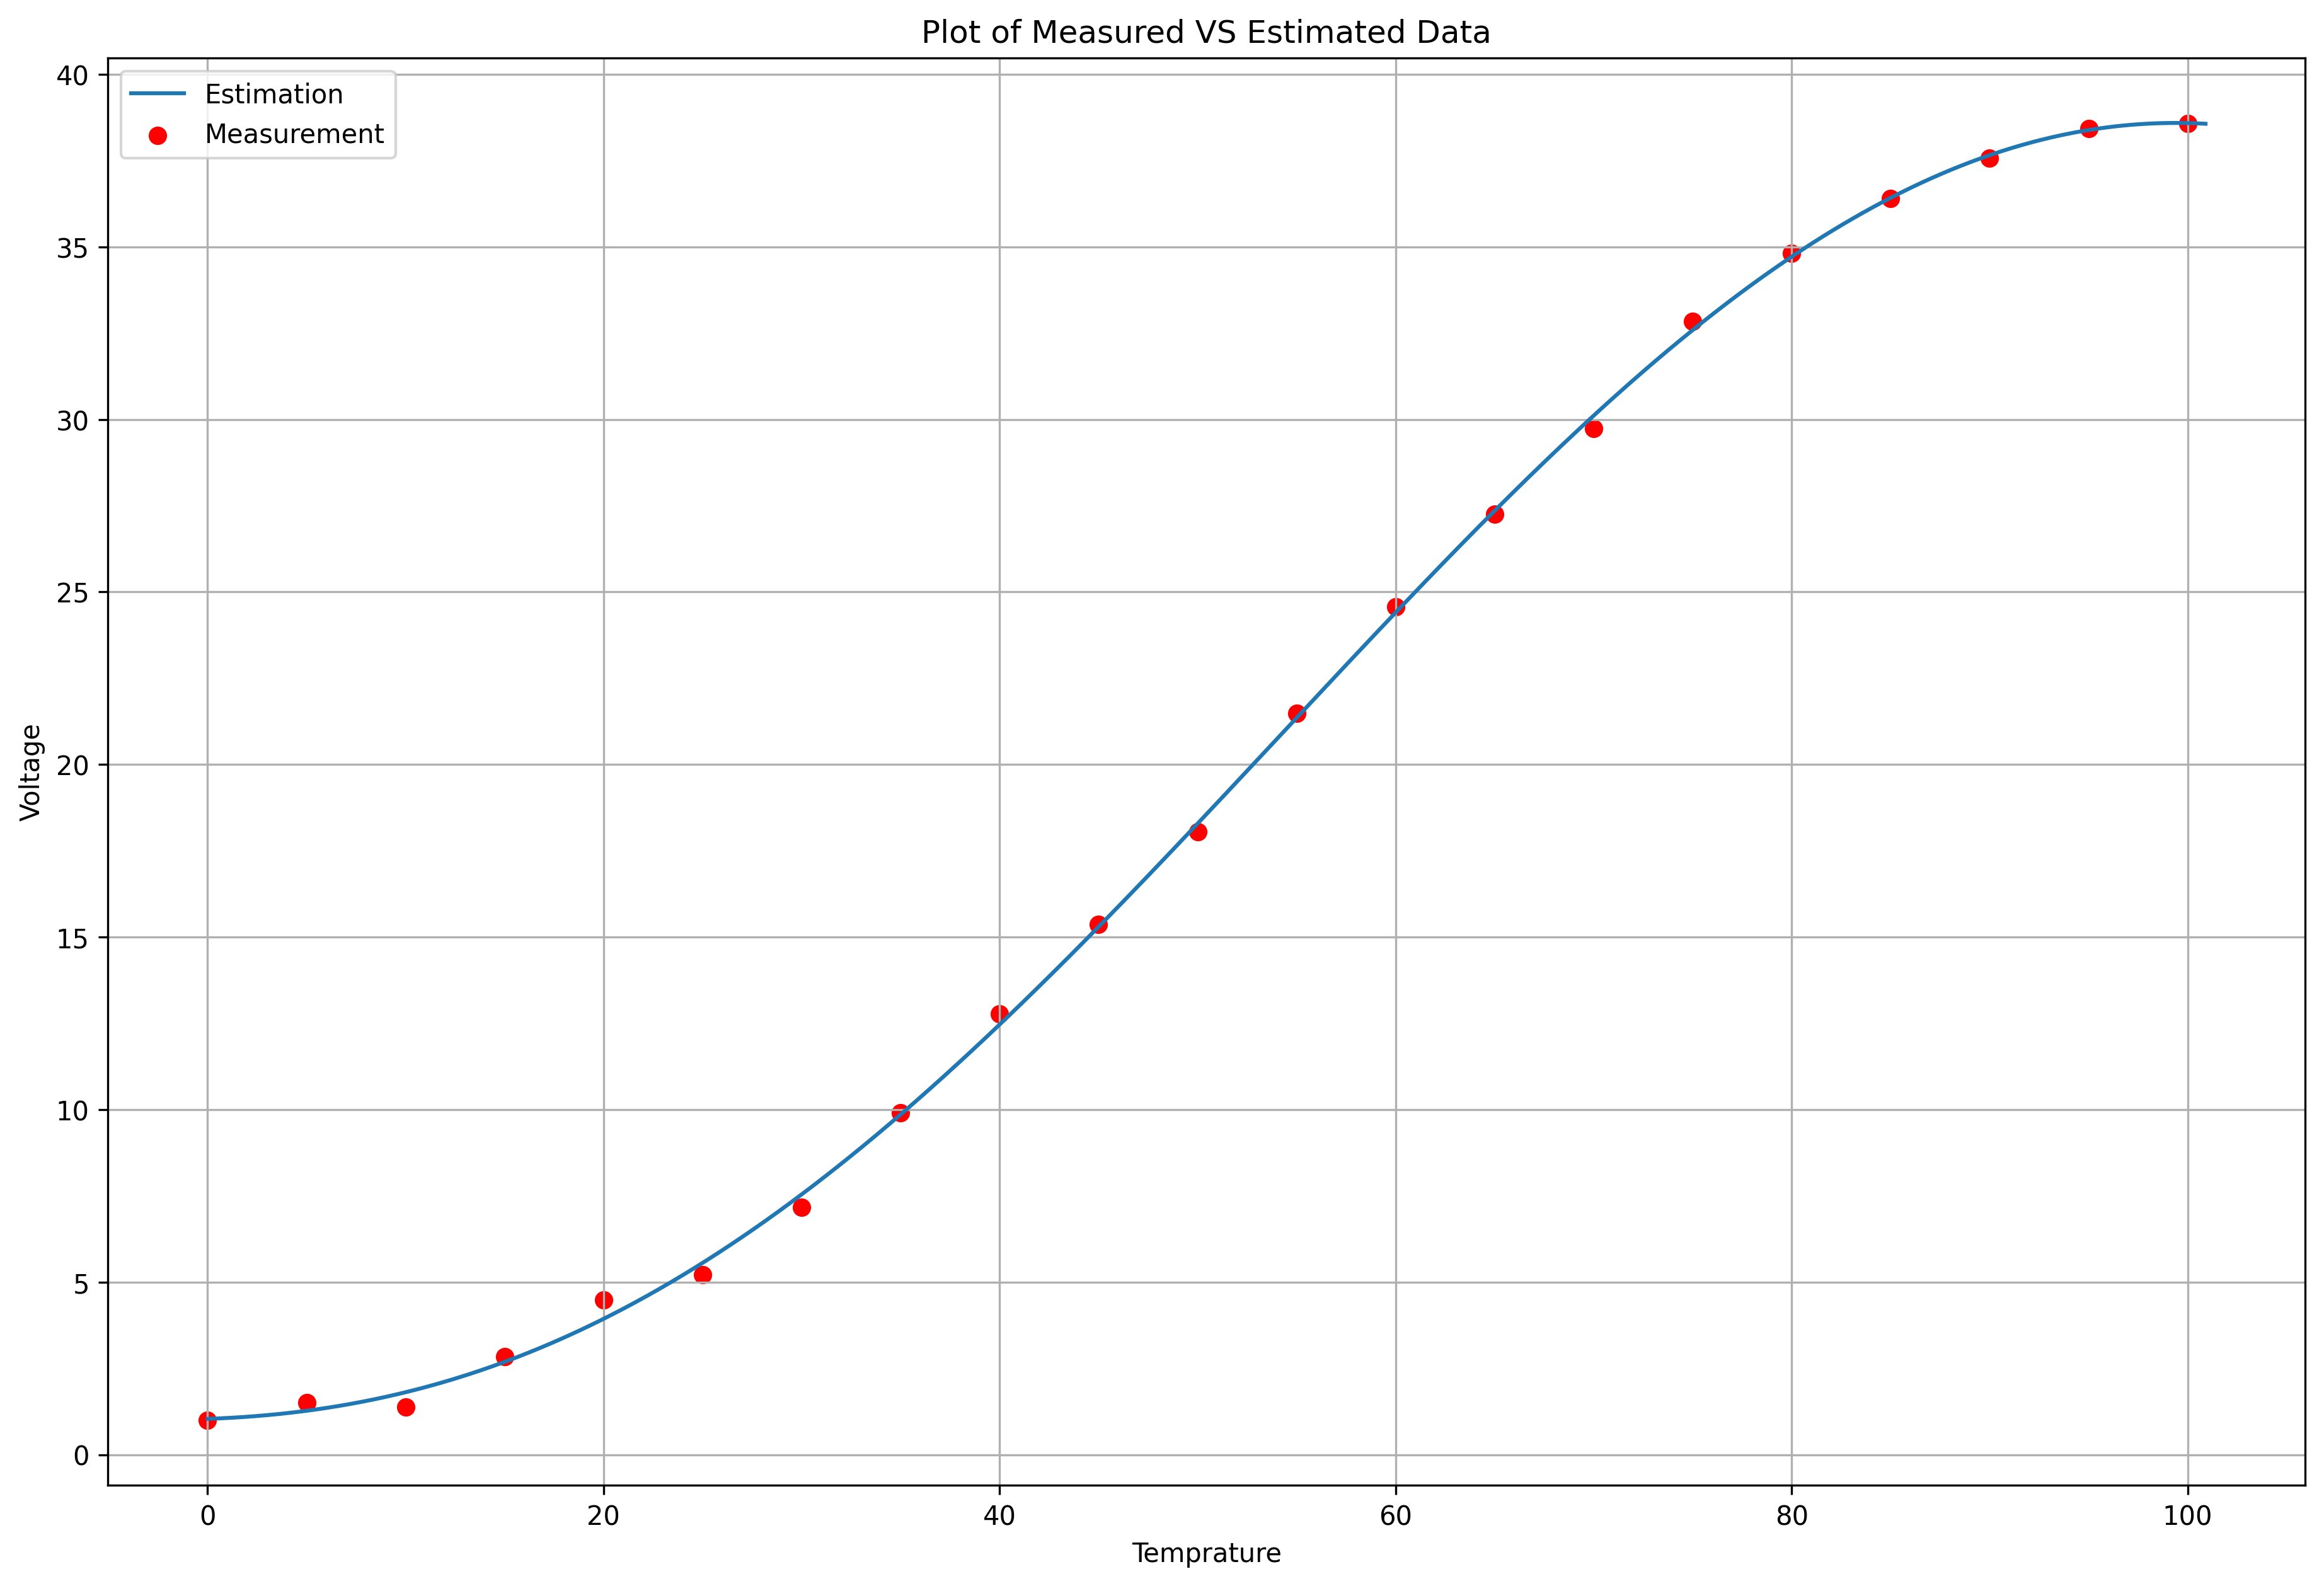

In [108]:
T_est = np.arange(0,101,0.1)
V_hat = a*T_est + b*T_est**2 + c*np.cos(0.04 * T_est + d) + e
plt.figure(figsize=(15,10), dpi=300)
plt.plot(T_est, V_hat)
plt.scatter(T, V, color='r')
plt.grid(True)
plt.legend(["Estimation", "Measurement"])
plt.title("Plot of Measured VS Estimated Data")
plt.xlabel("Temprature")
plt.ylabel("Voltage")
plt.show()

In [109]:
## Calculating the Mean Squered Error
dV2 = (V - X @ beta)**2
MSE = np.sum(dV2)/len(V)
print("Mean Squered Error =", MSE)

Mean Squered Error = 0.06042766086665361


## Question 4

### Part 1

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

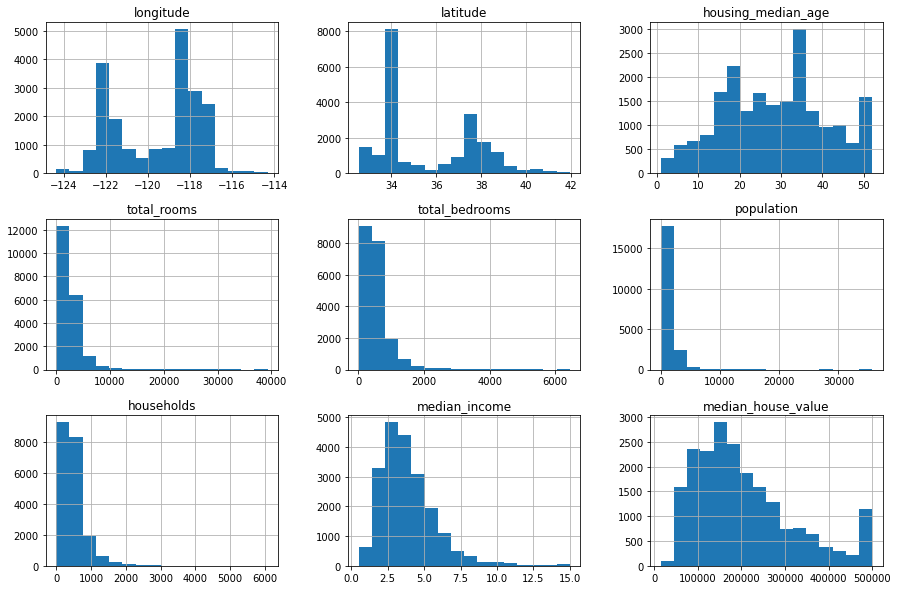

In [300]:
house_df = pd.read_csv('Q4_data.csv')
house_df.hist(figsize=(15,10), bins=16)


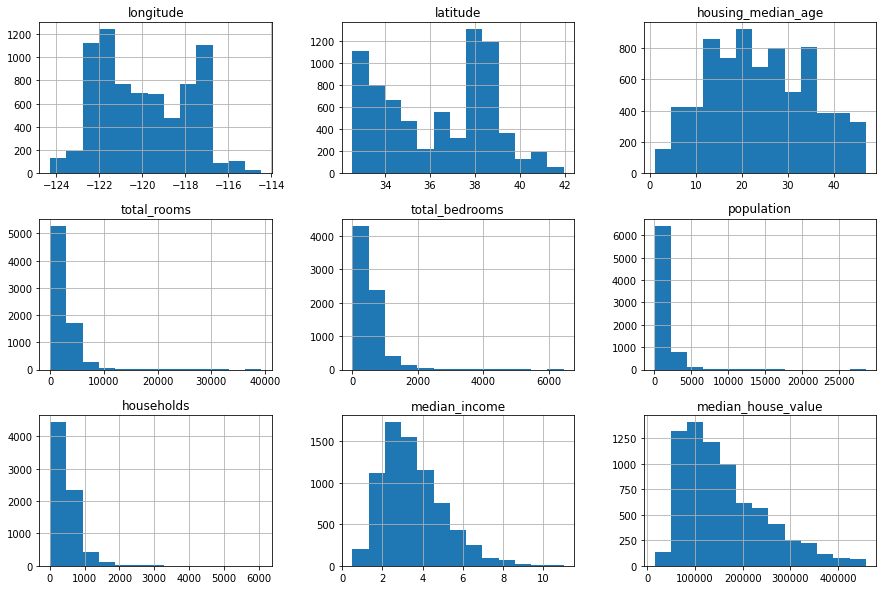

In [301]:
df = house_df[house_df['housing_median_age']<48]
df = df[(df['median_house_value']<460000)]
df = df[(df['latitude']>34.25) | (df['latitude']<33.75)]
df = df[(df['housing_median_age']<16.5) | (df['housing_median_age']>17)]
df = df[((df['latitude']<37.4) | (df['latitude']>37.7)) & ((df['latitude']<36.3) | (df['latitude']>36.6)) ]
df = df[((df['longitude'] > -121.8) | (df['longitude'] < -122.2)) & ((df['longitude']<-117.6) | (df['longitude']>-117.2))]
df.hist(figsize=(15,10),bins = 13)
df_shuffled = df.sample(frac=1).reset_index(drop=True)

### Part 2

In [302]:
df_test = df_shuffled[0:int(len(df_shuffled)*0.2)].dropna().reset_index(drop=True)
df_train = df_shuffled[int(len(df_shuffled)*0.2):len(df_shuffled)].dropna().reset_index(drop=True)

### Part 3

In [303]:
## Encoding 'Ocean Proximity' feature
ocean_proximity_set = tuple(set(df_shuffled['ocean_proximity']))
ocean_proximity_set

('INLAND', 'NEAR OCEAN', 'ISLAND', '<1H OCEAN', 'NEAR BAY')

We add 4 other features to the dataset: INLAND, NEAR OCEAN, ISLAND, <1H OCEAN
and if the oocean_proximity of a data was one of these we would set a 1 for that feature and a 0 for others. If the data's ocean_proximity was neither of them, then we would set them all to 0 for that particular data.

In [304]:
## Train Dataset
df_train_coded = df_train.copy()
df_train_coded['in'] = 0
df_train_coded['no'] = 0
df_train_coded['is'] = 0
df_train_coded['1h'] = 0
for i in range(len(df_train_coded)):
    ocean_proximity = df_train_coded.loc[i,'ocean_proximity']
    if ocean_proximity == 'INLAND':
        df_train_coded.loc[i,'in'] = 1
    elif ocean_proximity == 'NEAR OCEAN':
        df_train_coded.loc[i,'no'] = 1
    elif ocean_proximity == 'ISLAND':
        df_train_coded.loc[i,'is'] = 1
    elif ocean_proximity == '<1H OCEAN':
        df_train_coded.loc[i,'1h'] = 1
df_train_coded.drop('ocean_proximity', axis=1, inplace=True)

## Test Dataset
df_test_coded = df_test.copy()
df_test_coded['in'] = 0
df_test_coded['no'] = 0
df_test_coded['is'] = 0
df_test_coded['1h'] = 0
for i in range(len(df_test_coded)):
    ocean_proximity = df_test_coded.loc[i,'ocean_proximity']
    if ocean_proximity == 'INLAND':
        df_test_coded.loc[i,'in'] = 1
    elif ocean_proximity == 'NEAR OCEAN':
        df_test_coded.loc[i,'no'] = 1
    elif ocean_proximity == 'ISLAND':
        df_test_coded.loc[i,'is'] = 1
    elif ocean_proximity == '<1H OCEAN':
        df_test_coded.loc[i,'1h'] = 1
df_test_coded.drop('ocean_proximity', axis=1, inplace=True)

In [305]:
df_train_coded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,in,no,is,1h
0,-122.82,38.61,41,2720,501.0,987,364,4.0294,201700,0,0,0,1
1,-124.01,40.89,28,1470,336.0,811,314,2.4559,75600,0,0,0,1
2,-120.59,35.11,25,3642,726.0,1729,673,3.1550,205400,0,0,0,1
3,-122.33,37.94,43,1876,389.0,807,377,3.1571,141600,0,0,0,0
4,-118.31,35.74,18,2327,642.0,799,335,1.8419,92300,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,-117.95,33.69,24,4269,618.0,1954,597,6.9261,284600,0,0,0,1
5848,-117.97,33.73,18,3698,574.0,2046,614,6.2984,269800,0,0,0,1
5849,-119.14,34.28,31,790,241.0,1095,222,2.2500,75000,0,1,0,0
5850,-122.38,37.73,20,120,27.0,55,19,2.6250,187500,0,0,0,0


In [306]:
df_test_coded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,in,no,is,1h
0,-116.38,33.73,10,11836,2405.0,3811,1570,4.0079,134500,1,0,0,0
1,-118.90,34.41,35,4431,739.0,2304,720,4.2599,209100,0,0,0,1
2,-122.42,40.57,10,7949,1309.0,3176,1163,4.1099,120100,1,0,0,0
3,-118.45,34.31,9,1739,358.0,820,323,4.0556,182500,0,0,0,1
4,-115.37,32.81,32,741,191.0,623,169,1.7604,68600,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,-117.10,32.90,16,2994,445.0,1047,437,5.1490,184300,0,0,0,1
1464,-121.34,38.63,13,3033,540.0,1363,519,4.0036,161700,1,0,0,0
1465,-119.67,36.74,19,2788,614.0,1365,525,2.7813,120300,1,0,0,0
1466,-121.54,39.13,18,4289,1021.0,2707,939,1.3375,59600,1,0,0,0


In [307]:
train_array = df_train_coded.to_numpy()
X_train = np.insert(train_array, 0, 1, axis=1)
Y_train = X_train[:,9]
X_train = np.delete(X_train, 9, axis=1)

test_array = df_test_coded.to_numpy()
X_test = np.insert(test_array, 0, 1, axis=1)
Y_test = X_test[:,9]
X_test = np.delete(X_test, 9, axis=1)


In [310]:
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
MSE_train = np.sum((Y_train - (X_train @ beta))**2)/len(Y_train)
MSE_test = np.sum((Y_test - (X_test @ beta))**2)/len(Y_test)
print("Parameter Vector =\n",beta)
print("\nTrain MSE =",MSE_train)
print("\nTest MSE =",MSE_test)

Parameter Vector =
 [-1.53327411e+06 -1.77592143e+04 -1.47986715e+04  1.10461634e+02
 -2.97115051e+00  8.43388517e+01 -2.18342460e+01 -1.08179061e+01
  3.53491026e+04 -4.80765000e+04 -4.39847777e+03  1.94212829e+05
 -7.84550944e+03]

Train MSE = 2751146743.135342

Test MSE = 2624006073.8779073


### Part 4
In order to compare the importance of qualitative features, we can compare the f-statistic corresponding with two different models. The first model would be the one without the ocean_proximity as a feature and the other one with the ocean_proximity. Then by comparing these F-Statistics we can find the importance of the group features in comparison with others.